<a href="https://www.kaggle.com/code/winchestera1967/brainstroke-94?scriptVersionId=102875638" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv
/kaggle/input/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv


In [2]:
raw_df = pd.read_csv('/kaggle/input/full-filled-brain-stroke-dataset/full_data.csv')

In [3]:
raw_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
gender = pd.get_dummies(raw_df['gender'])
ever_married = pd.get_dummies(raw_df['ever_married'])
work_type = pd.get_dummies(raw_df['work_type'])
Residence_type = pd.get_dummies(raw_df['Residence_type'])
smoking_status = pd.get_dummies(raw_df['smoking_status'])

In [6]:
raw_df_new = pd.concat([raw_df, gender, ever_married, work_type, Residence_type, smoking_status], axis = 'columns')

In [7]:
raw_df_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,0,1,0,0,1,0,0,0,1,0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,1,0,0,0,1,0,0,0,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,0,1,0,1,0,0,0,1,0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,0,1,0,0,0,1,0,1,0,0


In [8]:
raw_df_new.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], axis = 1, inplace = True)

In [9]:
raw_df_new.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [10]:
raw_df_new.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
Female               0
Male                 0
No                   0
Yes                  0
Govt_job             0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
Unknown              0
formerly smoked      0
never smoked         0
smokes               0
dtype: int64

In [11]:
x = raw_df_new.drop('stroke',axis = 1)

In [12]:
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [13]:
y = raw_df_new['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [18]:
model.score(x_test, y_test)

0.794383149448345

In [19]:
model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model_new = DecisionTreeClassifier()
model_new.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
model.score(x_test, y_test)

0.794383149448345

In [24]:
from sklearn.tree import plot_tree, export_text

In [25]:
import matplotlib.pyplot as plt

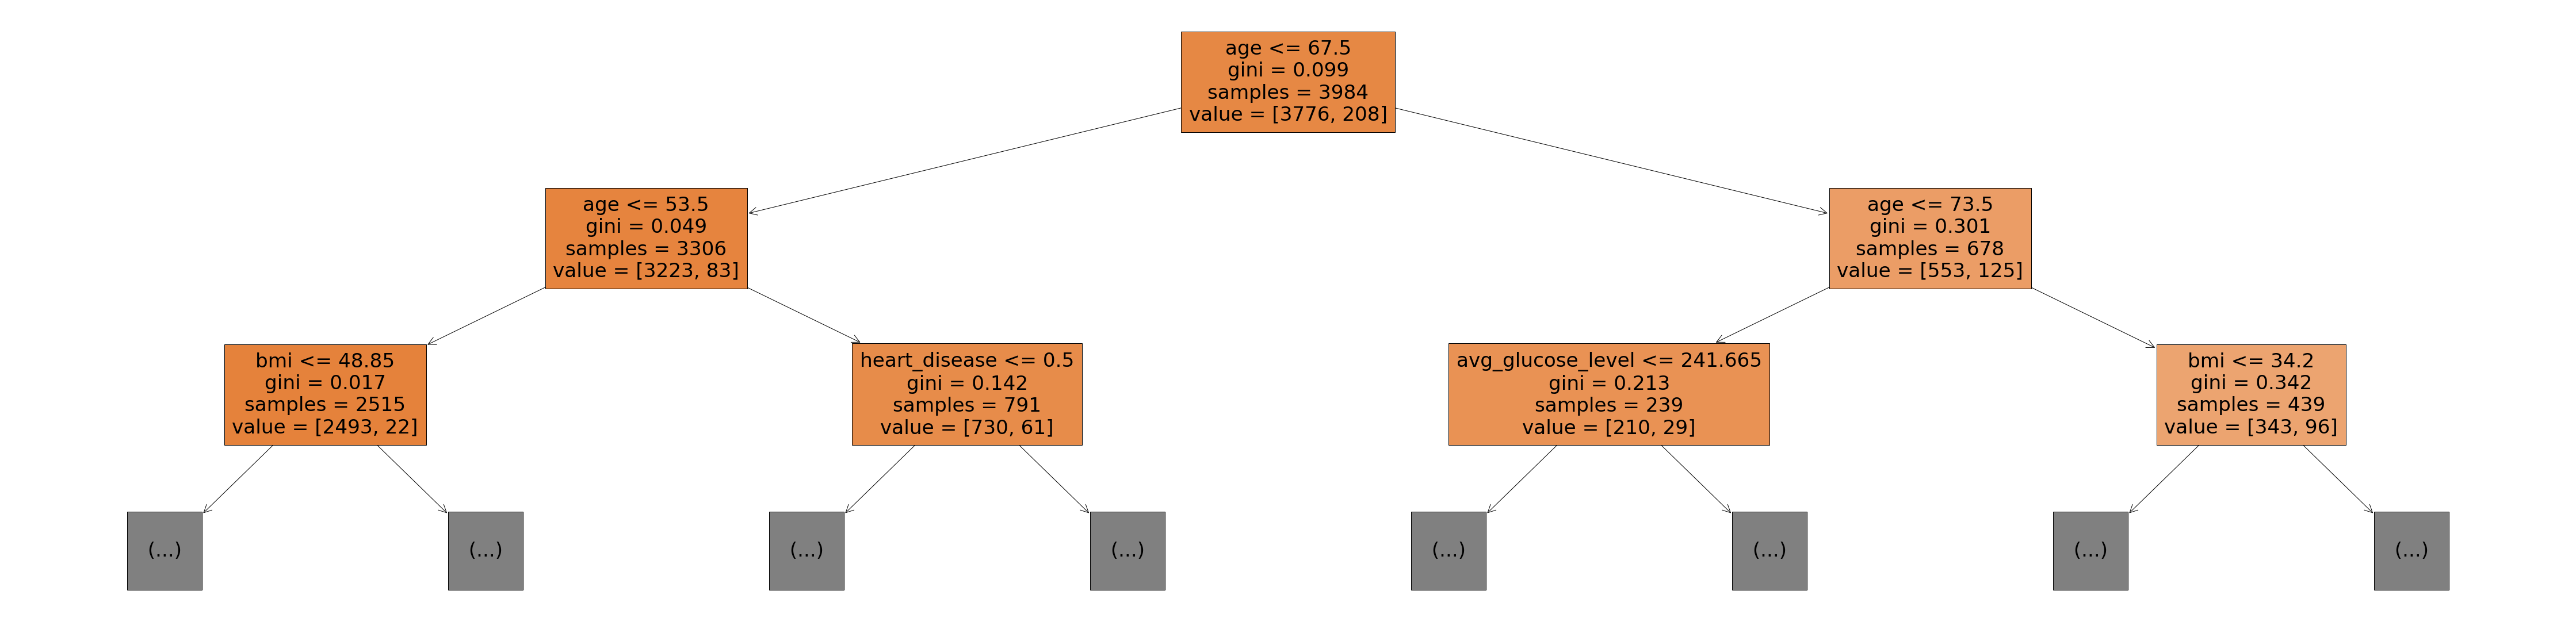

In [26]:
plt.figure(figsize=(80,20))
plot_tree(model_new, feature_names=x_train.columns, max_depth=2, filled=True);

In [27]:
tree_text = export_text(model_new, max_depth=10, feature_names=list(x_train.columns))
print(tree_text[:5000])

|--- age <= 67.50
|   |--- age <= 53.50
|   |   |--- bmi <= 48.85
|   |   |   |--- age <= 37.50
|   |   |   |   |--- avg_glucose_level <= 57.93
|   |   |   |   |   |--- avg_glucose_level <= 57.92
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- avg_glucose_level >  57.92
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- avg_glucose_level >  57.93
|   |   |   |   |   |--- age <= 1.36
|   |   |   |   |   |   |--- age <= 1.28
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  1.28
|   |   |   |   |   |   |   |--- avg_glucose_level <= 72.80
|   |   |   |   |   |   |   |   |--- Rural <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Rural >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- avg_glucose_level >  72.80
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  1.36
|   |   |   |   |   |   |--- smokes <= 0.50
|   |   |   |   | 

In [28]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model_new.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
3,avg_glucose_level,0.341017
4,bmi,0.246937
0,age,0.168805
11,Self-employed,0.032294
17,never smoked,0.023935
10,Private,0.022639
16,formerly smoked,0.021178
1,hypertension,0.018132
14,Urban,0.017749
15,Unknown,0.016777


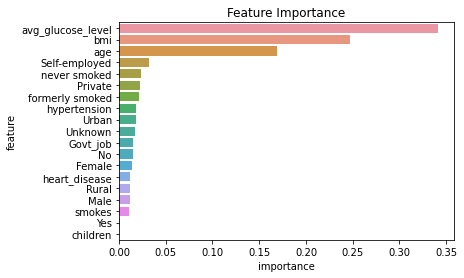

In [29]:
import seaborn as sns
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model3 = RandomForestClassifier(n_jobs=-1, random_state=42)

In [32]:
model3.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
model3.score(x_test, y_test)

0.9568706118355065

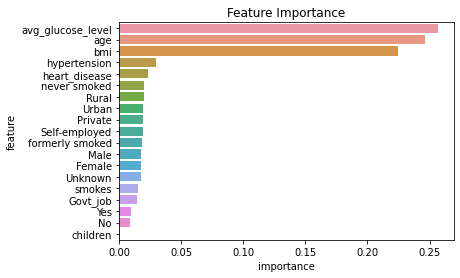

In [34]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model3.feature_importances_
}).sort_values('importance', ascending=False)

plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');